In [ ]:
1) Создайте многопанельный график, используя набор данных Iris. График должен включать:

Диаграмма рассеяния длины чашелистика по сравнению с шириной чашелистика на первой панели.

График разброса длины лепестка по ширине лепестка на второй панели.

Обе панели должны иметь одинаковые границы по оси x и оси y.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


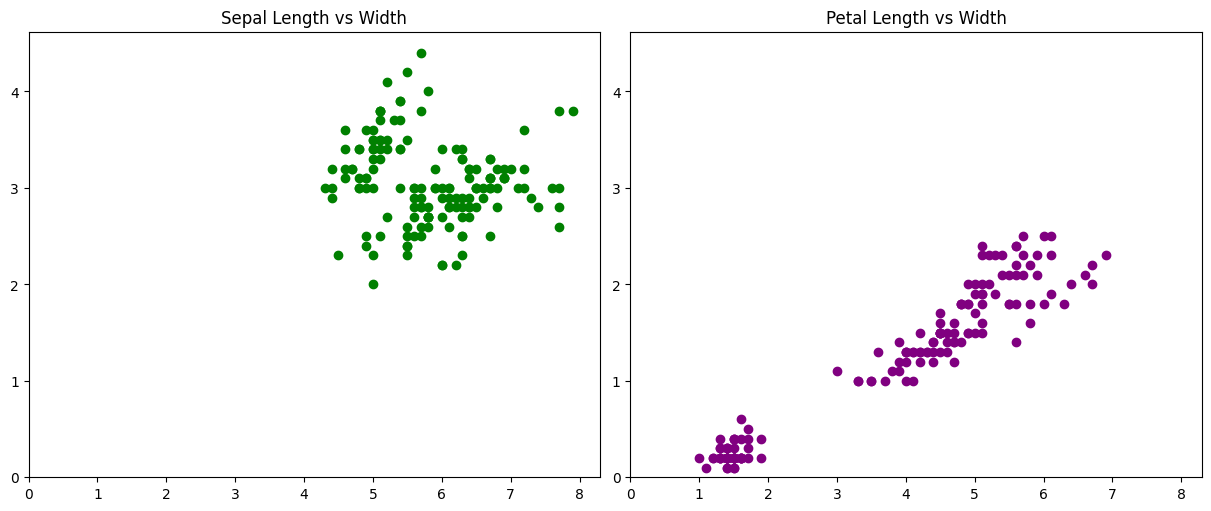

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)  # одна строка, два графика

ax1.scatter(iris['sepal_length'], iris['sepal_width'], color='green')
ax1.set_title('Sepal Length vs Width')

ax2.scatter(iris['petal_length'], iris['petal_width'], color='purple')
ax2.set_title('Petal Length vs Width')

x_min = min(0, iris['sepal_length'].min(), iris['petal_length'].min())
x_max = max(iris['sepal_length'].max(), iris['petal_length'].max()) * 1.05
y_min = min(0, iris['sepal_width'].min(), iris['petal_width'].min())
y_max = max(iris['sepal_width'].max(), iris['petal_width'].max()) * 1.05

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)

plt.show()

In [30]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


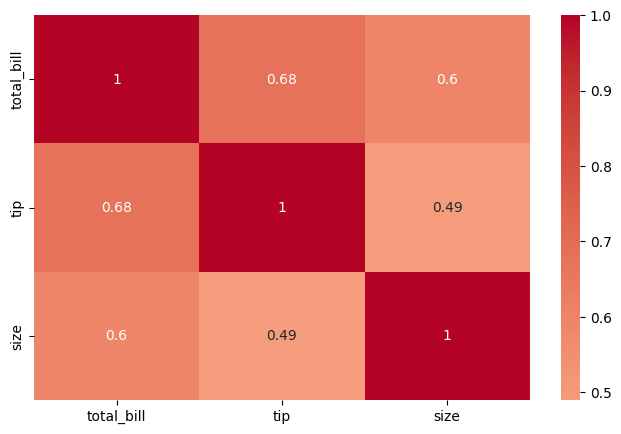

In [38]:
corr = tips.corr(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

In [44]:
import numpy as np
from scipy import stats

sample = iris[iris['species'] == 'setosa']
pethal_length_mean = 1.5
# H0 - средняя длина лепестка у видов Iris setosa незначительно отличается от 1,5 см
t_statistic, p_value = stats.ttest_1samp(sample['petal_length'], pethal_length_mean)

print('t-statistic:', t_statistic)
print('p-value:', p_value)
print("H0 - средняя длина лепестка у видов Iris setosa незначительно отличается от 1,5 см")
if p_value > 0.05:
    print('гипотезу оставляем')
else:
    print('гипотезу  отвергаем')
np.mean(sample['petal_length'])

t-statistic: -1.547244001617496
p-value: 0.1282393958174542
H0 - средняя длина лепестка у видов Iris setosa незначительно отличается от 1,5 см
гипотезу оставляем


np.float64(1.4620000000000002)